In [16]:
import sys

import matplotlib
import pandas as pd
import numpy as np
import scipy as sp

sys.path.insert(0, '../src/')
import item_collaborative_filtering                                                                                                                                                                                                                                        

In [2]:
%matplotlib inline

In [48]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")

In [4]:
df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Explore rating distribution

In [5]:
df.rating.describe()

count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [6]:
df.rating.value_counts()

4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64

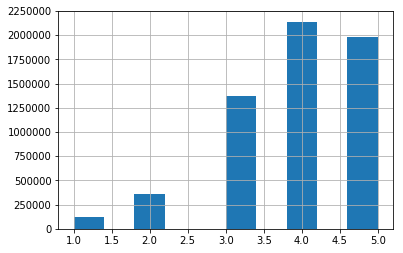

In [7]:
df.rating.hist()

**Assumption**: a score >=4 indicates that a user liked the book

In [8]:
df['liked'] = np.where(df.rating>=4, 1, 0)

68.97% of the ratings were *liking* a book.

In [11]:
df.liked.value_counts()/df.shape[0]

1    0.689722
0    0.310278
Name: liked, dtype: float64

## Item to item collaborative filtering

In [28]:
df_liked = df.loc[df.liked==1, ["user_id", "book_id"]]

In [29]:
df_liked.head()

,user_id,book_id
0,1,258
1,2,4081
2,2,260
3,2,9296
5,2,26


In [34]:
recommender = item_collaborative_filtering.ItemItemCollaborativeFiltering(item_column='book_id') 

In [40]:
%%time
df_recommendations = recommender.fit_recommendations(df=df_liked, item=4081, processes=4)

CPU times: user 38.5 s, sys: 3.43 s, total: 42 s
Wall time: 25min 39s


In [42]:
df_recommendations.head()

,item,recommended_item,count_common_users,expected_common_users,score
0,4081,258,17,168.444637,-33.128571
1,4081,260,7,142.738002,-22.269410
2,4081,9296,1,19.264920,-0.396619
3,4081,26,37,172.954897,-37.356875
4,4081,33,48,172.968200,-36.804042


In [44]:
df_recommendations.sort_values('score', ascending=False).head()

,item,recommended_item,count_common_users,expected_common_users,score
1794,4081,6944,37,35.638839,0.823929
2434,4081,9762,1,6.010209,-0.194783
1777,4081,9416,1,8.301192,-0.241525
2940,4081,9080,1,9.559485,-0.263858
2761,4081,9813,1,9.809913,-0.268089


In [45]:
df_books = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv")

In [46]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [49]:
df_books[df_books.book_id==4081]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
4080,4081,231,231,1005335,53,312424442,9.780312e+12,Tom Wolfe,2004.0,NaN,I am Charlotte Simmons,en-US,3.4,19293,21580,1891,1481,2886,6557,6890,3766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [50]:
df_books[df_books.book_id==6944]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6943,6944,86172,86172,1997693,54,553381334,9.780553e+12,Tom Wolfe,1998.0,A Man in Full,A Man in Full,NaN,3.8,12540,13565,760,265,945,3480,5407,3468,https://images.gr-assets.com/books/1320472513m...,https://images.gr-assets.com/books/1320472513s...


In [51]:
df_books[df_books.book_id==26]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
25,26,968,968,2982101,350,307277674,9.780307e+12,Dan Brown,2003.0,The Da Vinci Code,"The Da Vinci Code (Robert Langdon, #2)",eng,3.79,1447148,1557292,41560,71345,126493,340790,539277,479387,https://images.gr-assets.com/books/1303252999m...,https://images.gr-assets.com/books/1303252999s...
